In [1]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Reading the data

df = pd.read_csv('./Drug Performance Evaluation.csv')
df.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Information
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,"\r\n\t\t\t\t\tLevofloxacin is used to treat a variety of bacterial infections. This is a generic drug. The average cash price for 10 Tablet(s), 500mg each of the generic (levofloxacin) is $172.99. You can buy levofloxacin at the discounted price of $47.08 by using the WebMDRx coupon, a savings of 73%. Even if this drug is covered by Medicare or your insurance, we recommend you compare prices. The WebMDRx coupon or cash price may be less than your co-pay.\r\n\t\t\t\t"
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994 Reviews,2.52,3.01,1.84,"\r\n\t\t\t\t\tLevofloxacin is used to treat a variety of bacterial infections. This is a generic drug. The average cash price for 10 Tablet(s), 500mg each of the generic (levofloxacin) is $172.99. You can buy levofloxacin at the discounted price of $47.08 by using the WebMDRx coupon, a savings of 73%. Even if this drug is covered by Medicare or your insurance, we recommend you compare prices. The WebMDRx coupon or cash price may be less than your co-pay.\r\n\t\t\t\t"
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755 Reviews,2.78,3.00,2.08,"\r\n\t\t\t\t\t This is a generic drug. The average cash price for 1 Bottle, 3ml of 0.5% each of the generic (moxifloxacin hcl) is $74.99. You can buy moxifloxacin hcl at the discounted price of $34.89 by using the WebMDRx coupon, a savings of 53%. Even if this drug is covered by Medicare or your insurance, we recommend you compare prices. The WebMDRx coupon or cash price may be less than your co-pay.\r\n\t\t\t\t"
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,"\r\n\t\t\t\t\tAzithromycin is an antibiotic (macrolide-type). This is a generic drug. The average cash price for 1 Disp Pack, 6 tablets each of the generic (azithromycin) is $32.10. You can buy azithromycin at the discounted price of $12.48 by using the WebMDRx coupon, a savings of 61%. Even if this drug is covered by Medicare or your insurance, we recommend you compare prices. The WebMDRx coupon or cash price may be less than your co-pay.\r\n\t\t\t\t"
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584 Reviews,3.21,4.01,2.57,"\r\n\t\t\t\t\tAzithromycin is an antibiotic (macrolide-type). This is a generic drug. The average cash price for 1 Disp Pack, 6 tablets each of the generic (azithromycin) is $32.10. You can buy azithromycin at the discounted price of $12.48 by using the WebMDRx coupon, a savings of 61%. Even if this drug is covered by Medicare or your insurance, we recommend you compare prices. The WebMDRx coupon or cash price may be less than your co-pay.\r\n\t\t\t\t"


In [3]:
df.describe()

,Effective,EaseOfUse,Satisfaction
count,2219.000000,2219.000000,2219.000000
mean,3.557972,3.958824,3.218774
std,1.113128,1.037877,1.230933
min,1.000000,1.000000,1.000000
25%,3.000000,3.540000,2.400000
50%,3.680000,4.100000,3.130000
75%,4.330000,5.000000,4.000000
max,5.000000,5.000000,5.000000


In [4]:
# Checking the feature data types

df.dtypes

Condition        object
Drug             object
Indication       object
Type             object
Reviews          object
Effective       float64
EaseOfUse       float64
Satisfaction    float64
Information      object
dtype: object

In [5]:
df.columns

Index(['Condition', 'Drug', 'Indication', 'Type', 'Reviews', 'Effective',
       'EaseOfUse', 'Satisfaction', 'Information'],
      dtype='object')

In [6]:
# Checking value counts of each feature

In [7]:
df.Condition.value_counts()

fever                                        308
hypertension                                 236
Atopic Dermatitis                            209
endometriosis                                163
gastroesophageal reflux disease              131
Bacterial Urinary Tract Infection            131
back pain                                    123
gout                                         110
Pharyngitis due to Streptococcus Pyogenes     83
vertigo                                       81
flatulence                                    76
Acute Bacterial Sinusitis                     65
hypercholesterolemia                          59
hemorrhoids                                   53
diverticulitis of gastrointestinal tract      48
Bacterial Conjunctivitis                      42
edema                                         41
prevention of cerebrovascular accident        38
depression                                    32
vulvovaginal candidiasis                      29
fibromyalgia        

In [8]:
df.Drug.value_counts()

Acetaminophen                                             114
Ibuprofen                                                  73
Diphenhydramine Hcl                                        58
Aspirin                                                    42
Sulfamethoxazole-Trimethoprim                              40
                                                         ... 
Pramoxine-Zinc Oxide                                        1
Hydrocortisone Acetate, Bismuth Subg-Balsam-Znox-Resor      1
Fluocinolone-Skin Clnsr28                                   1
Starch, Pramoxine-Mineral Oil-Zinc                          1
Zinc Oxide                                                  1
Name: Drug, Length: 470, dtype: int64

In [9]:
df.Indication.value_counts()

On Label     1723
Off Label     465
\r\n           31
Name: Indication, dtype: int64

In [10]:
# Replacing '\r\n' with 'Unknown' values in 'Indication' column

df['Indication'] = df['Indication'].str.replace('\r\n', 'Unknown')
df['Indication'].value_counts()

On Label     1723
Off Label     465
Unknown        31
Name: Indication, dtype: int64

In [11]:
# Replacing '\r\n' with 'Unknown' values in 'Type' column

df['Type'] = df['Type'].str.replace('\r\n', 'Unknown')
df['Type'].value_counts()

RX         1401
OTC         737
RX/OTC       74
Unknown       7
Name: Type, dtype: int64

In [12]:
df.Reviews.value_counts()

1 Reviews       563
2 Reviews       238
3 Reviews       120
4 Reviews       100
5 Reviews        77
               ... 
3066 Reviews      1
4647 Reviews      1
51 Reviews        1
62 Reviews        1
123 Reviews       1
Name: Reviews, Length: 241, dtype: int64

In [13]:
# Removing 'Reviews' word from the feature

df['Reviews'] = df['Reviews'].str.replace('Reviews', '')
df['Reviews'].value_counts()

1        563
2        238
3        120
4        100
5         77
        ... 
3066       1
4647       1
51         1
62         1
123        1
Name: Reviews, Length: 241, dtype: int64

In [14]:
# Converting dtype of 'Reviews' from 'object' to 'int'

df['Reviews'] = df['Reviews'].astype(int)

In [15]:
# Checking for null values

df.isnull().sum()

Condition       0
Drug            0
Indication      0
Type            0
Reviews         0
Effective       0
EaseOfUse       0
Satisfaction    0
Information     0
dtype: int64

In [16]:
# Dropping 'Information' feature from the datset

df.drop('Information', axis=1, inplace=True)

In [17]:
df.shape

(2219, 8)

In [18]:
df.head()

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755,2.78,3.00,2.08
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57


### EDA

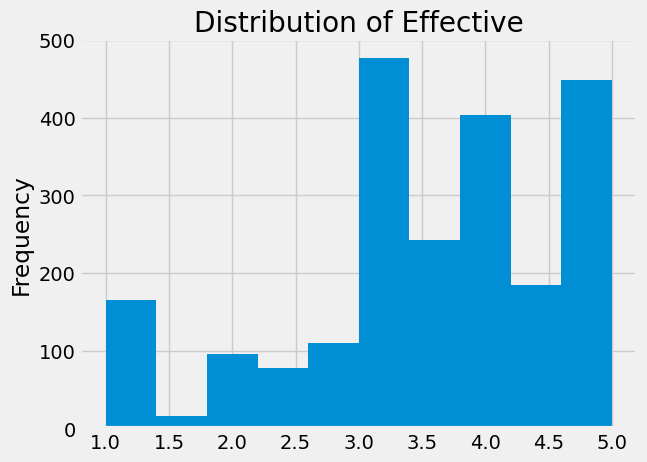

In [19]:
df['Effective'].plot.hist()
plt.title('Distribution of Effective')
plt.show()

In [20]:
effectiveness = []
for value in df['Effective']:
    if value < 1.0 : effectiveness.append('Very Uneffective')
    elif value < 2.0 : effectiveness.append('Uneffective')
    elif value < 3.0 : effectiveness.append('Neutral')
    elif value < 4.0 : effectiveness.append('Effective')
    elif value <= 5.0 : effectiveness.append('Very Effective')

In [21]:
df['Effectiveness'] = effectiveness

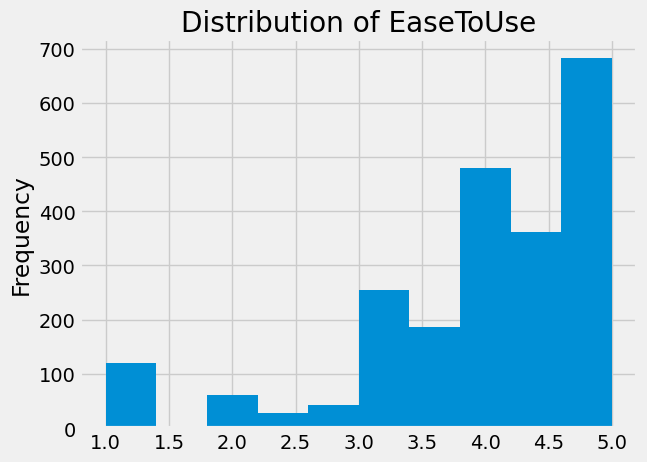

In [22]:
df['EaseOfUse'].plot.hist()
plt.title('Distribution of EaseToUse')
plt.show()

In [23]:
EaseToUse = []
for value in df['EaseOfUse']:
    if value < 1.0 : EaseToUse.append('Very Difficult')
    elif value < 2.0 : EaseToUse.append('Difficult')
    elif value < 3.0 : EaseToUse.append('Moderate')
    elif value < 4.0 : EaseToUse.append('Easy')
    elif value <= 5.0 : EaseToUse.append('Very Easy')

In [24]:
df['EaseToUse'] = EaseToUse

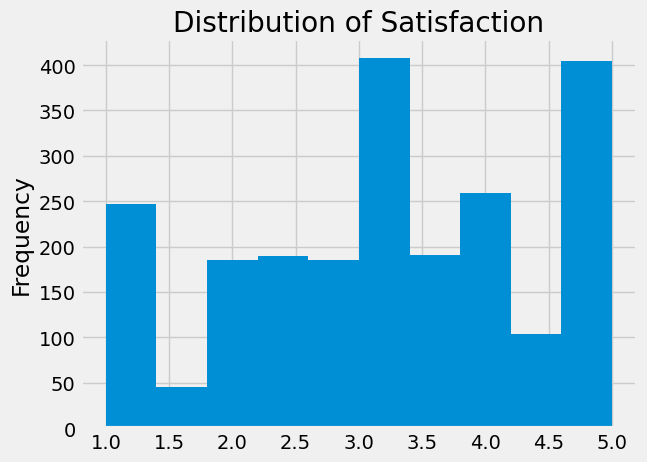

In [25]:
df['Satisfaction'].plot.hist()
plt.title('Distribution of Satisfaction')
plt.show()

In [26]:
satisfaction = []
for value in df['Satisfaction']:
    if value < 1.0 : satisfaction.append('Highly Unsatisifed')
    elif value < 2.0 : satisfaction.append('Unsatisifed')
    elif value < 3.0 : satisfaction.append('Partly Satisfied')
    elif value < 4.0 : satisfaction.append('Satisfied')
    elif value <= 5.0 : satisfaction.append('Very Satisfied')

In [27]:
df['satisfied'] = satisfaction

In [28]:
df

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Effectiveness,EaseToUse,satisfied
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,Neutral,Easy,Unsatisifed
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,Neutral,Easy,Unsatisifed
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755,2.78,3.00,2.08,Neutral,Easy,Partly Satisfied
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,Effective,Very Easy,Partly Satisfied
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,Effective,Very Easy,Partly Satisfied
...,...,...,...,...,...,...,...,...,...,...,...
2214,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,2,5.00,5.00,5.00,Very Effective,Very Easy,Very Satisfied
2215,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,RX,1,5.00,5.00,5.00,Very Effective,Very Easy,Very Satisfied
2216,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,1,5.00,4.00,5.00,Very Effective,Very Easy,Very Satisfied
2217,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,OTC,1,5.00,5.00,5.00,Very Effective,Very Easy,Very Satisfied


In [29]:
df.shape

(2219, 11)

In [30]:
df.drop_duplicates()
df.reset_index(drop=True)

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Effectiveness,EaseToUse,satisfied
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,Neutral,Easy,Unsatisifed
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,Neutral,Easy,Unsatisifed
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755,2.78,3.00,2.08,Neutral,Easy,Partly Satisfied
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,Effective,Very Easy,Partly Satisfied
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,Effective,Very Easy,Partly Satisfied
...,...,...,...,...,...,...,...,...,...,...,...
2214,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,2,5.00,5.00,5.00,Very Effective,Very Easy,Very Satisfied
2215,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,RX,1,5.00,5.00,5.00,Very Effective,Very Easy,Very Satisfied
2216,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,1,5.00,4.00,5.00,Very Effective,Very Easy,Very Satisfied
2217,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,OTC,1,5.00,5.00,5.00,Very Effective,Very Easy,Very Satisfied


In [31]:
df.shape

(2219, 11)

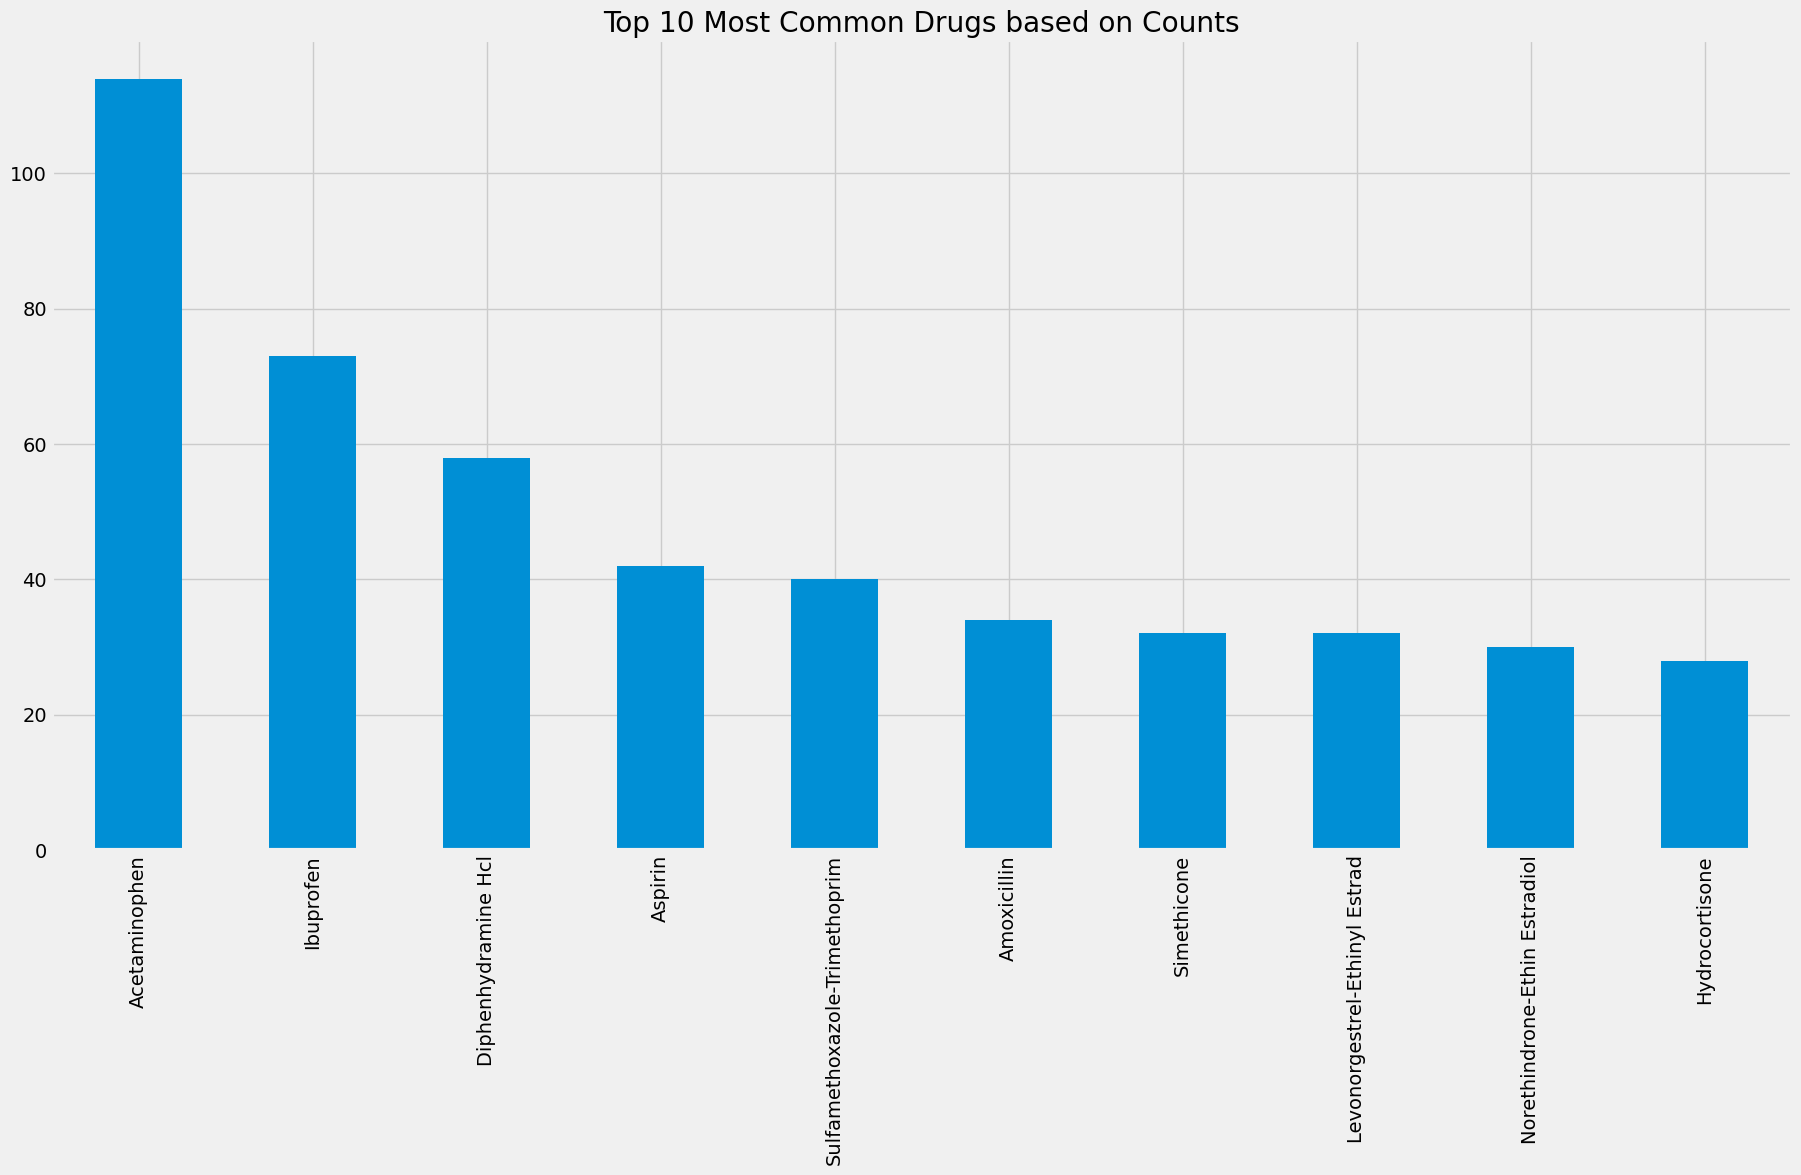

In [32]:
# Top 10 Most Common Drugs

plt.figure(figsize = (20,10))
df['Drug'].value_counts().nlargest(10).plot(kind='bar')
plt.title('Top 10 Most Common Drugs based on Counts')
plt.show()

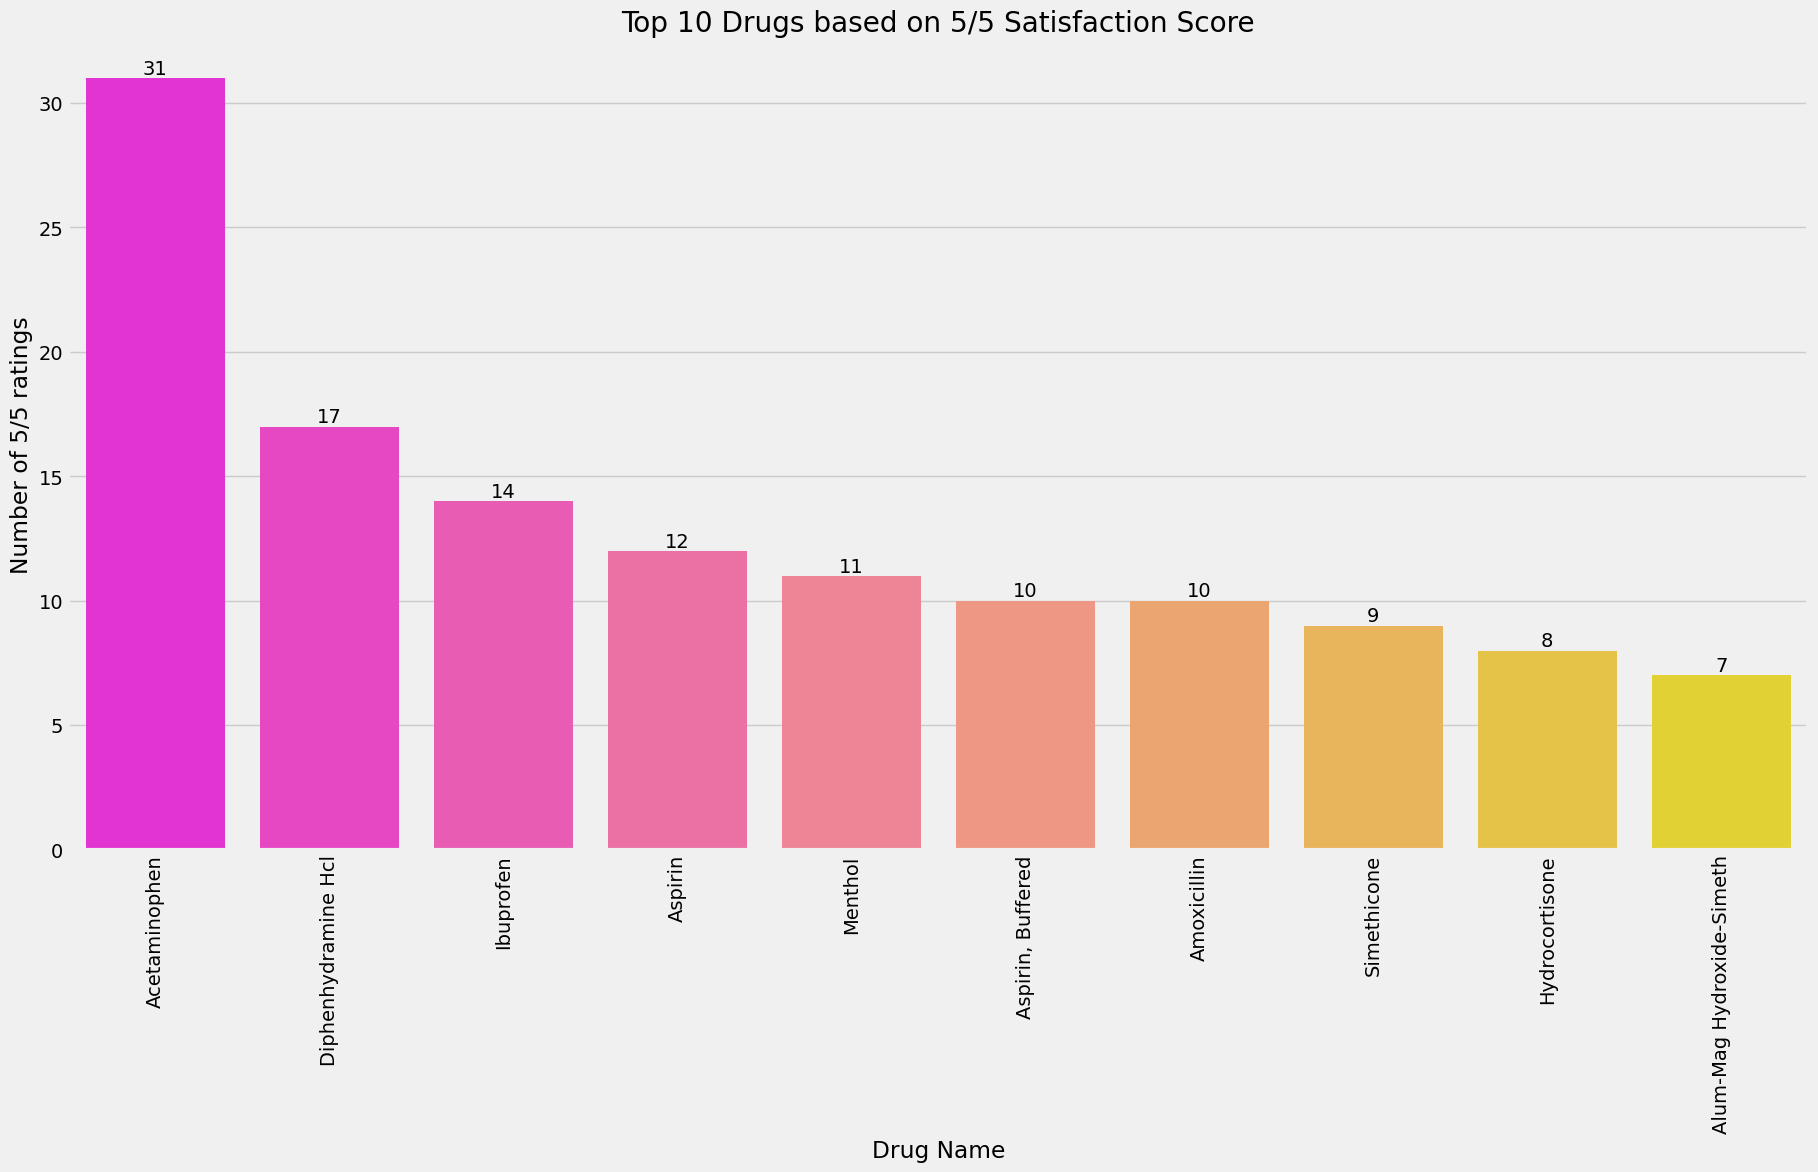

In [33]:
# Top 10 Drugs based on 5/5 Satisfactory Score

plt.figure(figsize=(20,10))
rating = dict(df.loc[df.Satisfaction == 5.0, 'Drug'].value_counts())
drug = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drug[0:10], y = drug_rating[0:10], palette = 'spring')

for i in sns_rating.containers:
    sns_rating.bar_label(i, )
    
plt.title('Top 10 Drugs based on 5/5 Satisfaction Score')
plt.xlabel('Drug Name')
plt.ylabel('Number of 5/5 ratings')
plt.xticks(rotation=90)
plt.show()

##### Acetaminophen, Diphenhydramine Hcl, ibuprofen are the drugs with highest Satisfactory Rating of 5

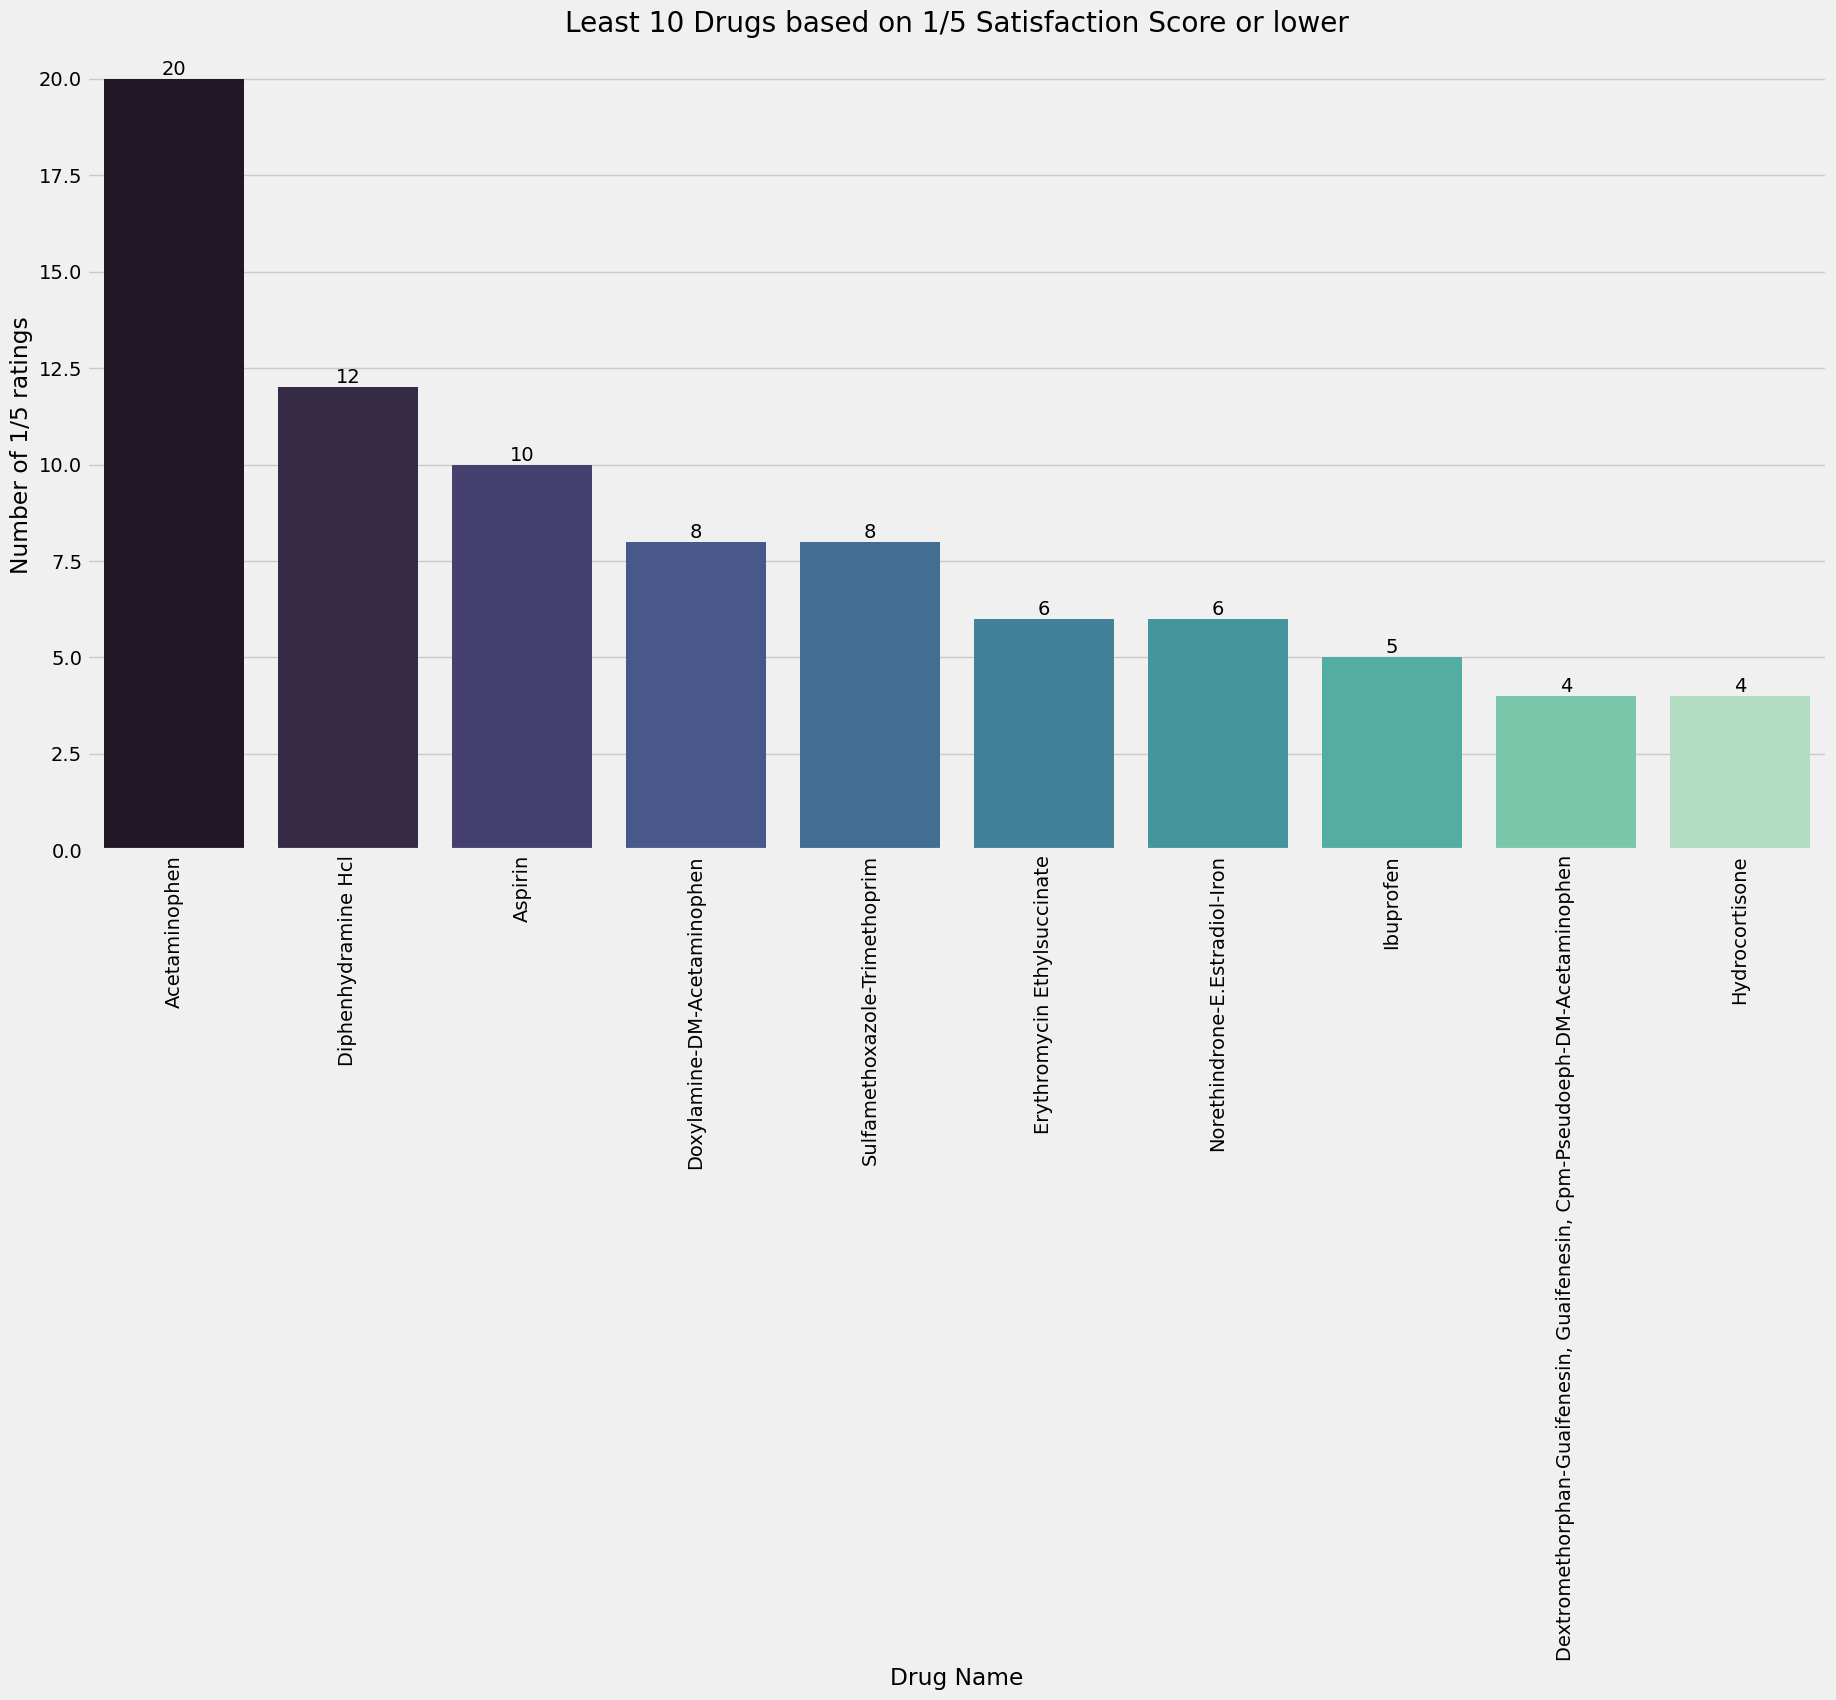

In [34]:
# Least 10 Drugs based on 1/5 Satisfactory Score

plt.figure(figsize=(20,10))
rating = dict(df.loc[df.Satisfaction <= 1.0, 'Drug'].value_counts())
drug = list(rating.keys())
drug_rating = list(rating.values())

sns_rating = sns.barplot(x = drug[0:10], y = drug_rating[0:10], palette = 'mako')

for i in sns_rating.containers:
    sns_rating.bar_label(i, )
    
plt.title('Least 10 Drugs based on 1/5 Satisfaction Score or lower')
plt.xlabel('Drug Name')
plt.ylabel('Number of 1/5 ratings')
plt.xticks(rotation=90)
plt.show()

##### Acetaminophen, Diphenhydramine HCl, ASpirin are the drugs with least Satisfactory Scores i.e less than 1.0

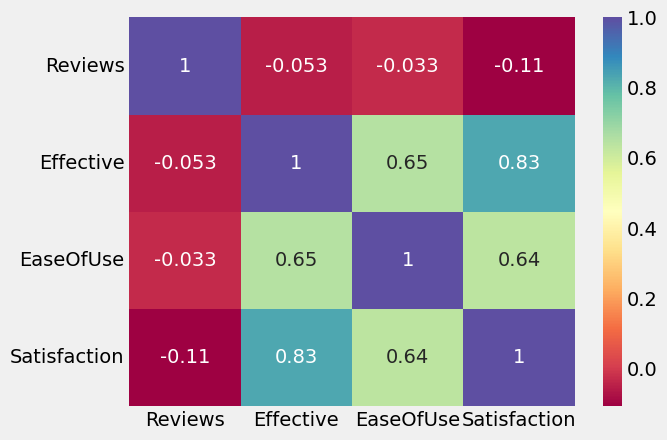

In [35]:
sns.heatmap(df.corr(), annot=True, cmap='Spectral')
plt.show()

##### It mostly shows positive Correlation among the features.
##### But, Satisfaction and Effective have higher Correlation Score, that means if a drug is more effective, then the patient is highly satisfied.

#### How many Conditions are suffered by patients?

In [36]:
print("Total Conditions suffered by patients: ",len(df['Condition'].unique().tolist()))

Total Conditions suffered by patients:  37


In [37]:
# Most commonest Conditions
cond = df['Condition'].value_counts().nlargest(20)

In [38]:
common_cond = pd.DataFrame({'conds':cond.index,'counts':cond.values})
common_cond

,conds,counts
0,fever,308
1,hypertension,236
2,Atopic Dermatitis,209
3,endometriosis,163
4,gastroesophageal reflux disease,131
...,...,...
15,Bacterial Conjunctivitis,42
16,edema,41
17,prevention of cerebrovascular accident,38
18,depression,32


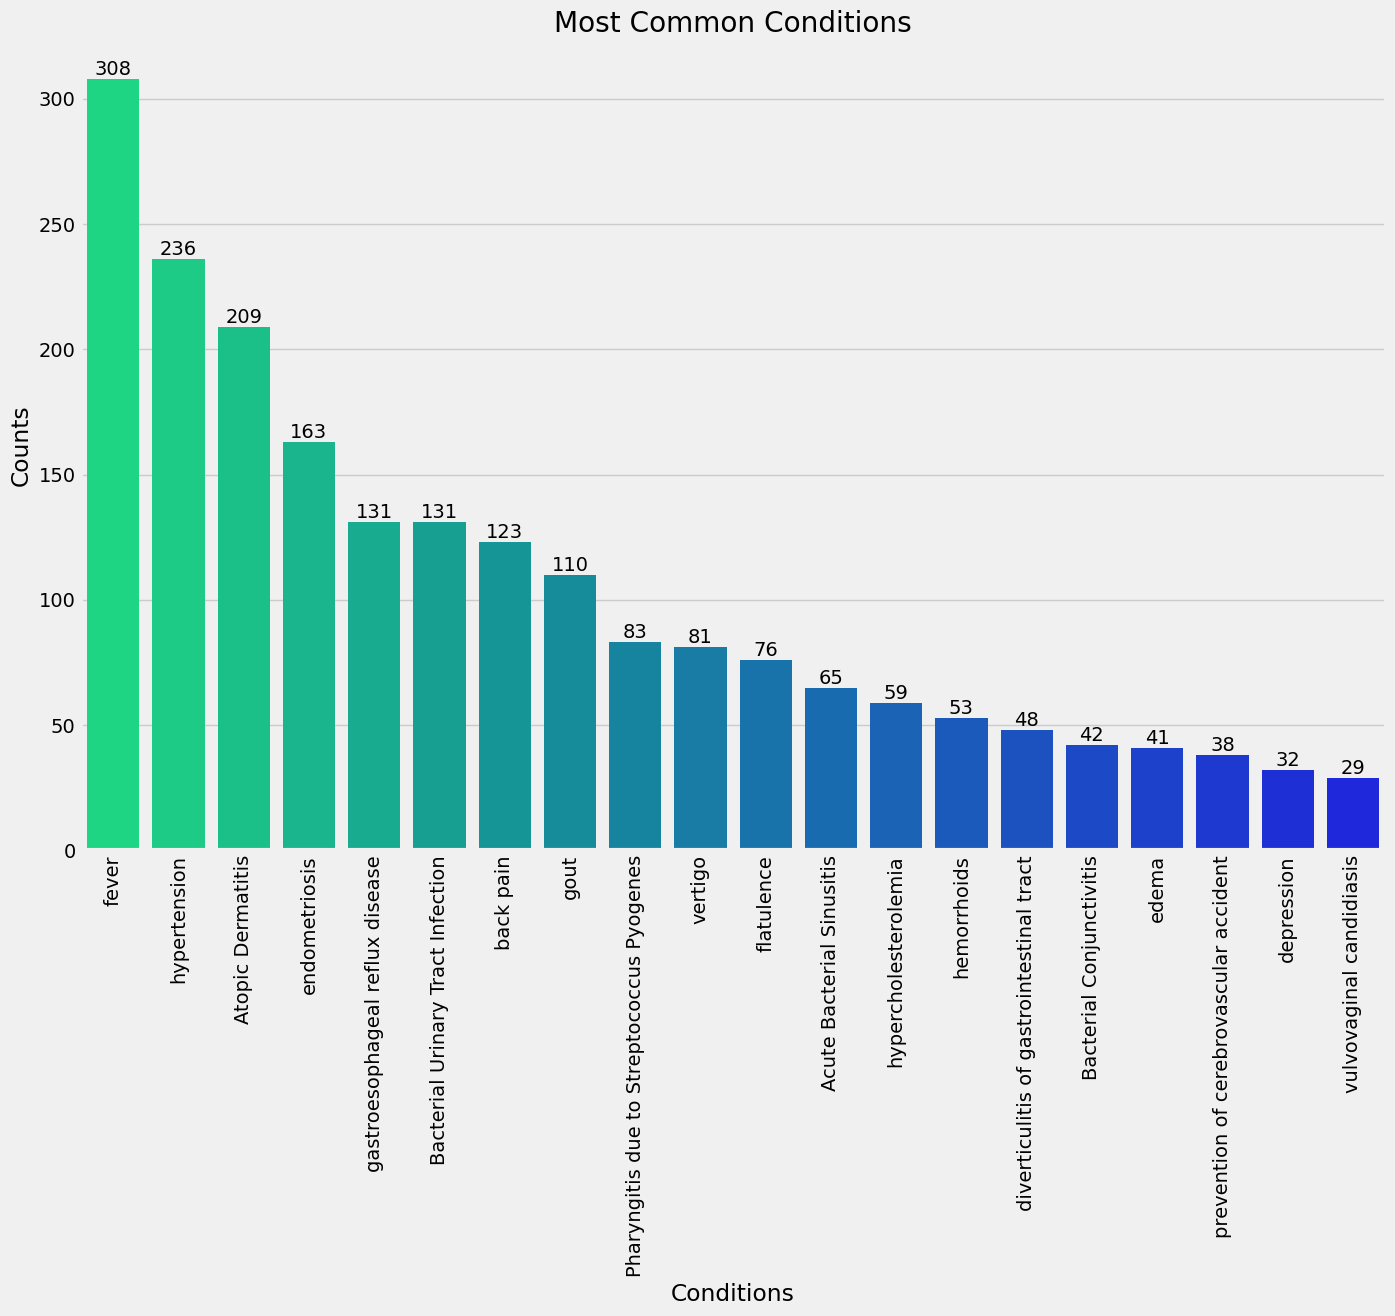

In [39]:
plt.figure(figsize=(15,10))

sns_1 = sns.barplot(data=common_cond, x = 'conds', y = 'counts', palette = 'winter_r')
sns_1

for i in sns_1.containers:
    sns_1.bar_label(i, )
    
plt.title('Most Common Conditions')
plt.xlabel('Conditions')
plt.ylabel('Counts')
plt.xticks(rotation=90)
plt.show()

##### Fever, Hypertension, Atopic Dermatitis are the most common conditions suffered by patients, followed by others.

In [40]:
# Average Rating of Drugs
avg_rating = (df['Satisfaction'].groupby(df['Drug']).mean())
avg_rating

Drug
ASA-Acetaminophen-Salicyl-Caff                                    2.287500
ASA-Acetaminophen-Salicyl-Caff, Mg Salicylat-Acetaminophen-Caf    2.800000
Acebutolol                                                        4.200000
Acetaminophen                                                     3.380439
Acetaminophen-Caffeine                                            4.880000
                                                                    ...   
Vit E-Glycerin-Dimethicone                                        5.000000
Vit E-Glycerin-Dimethicone, Glycerin-Dimethicone-Petro, Wh        2.500000
Vit E-Grape-Hyaluronate Sodium                                    3.770000
Zanamivir                                                         2.000000
Zinc Oxide                                                        1.000000
Name: Satisfaction, Length: 470, dtype: float64

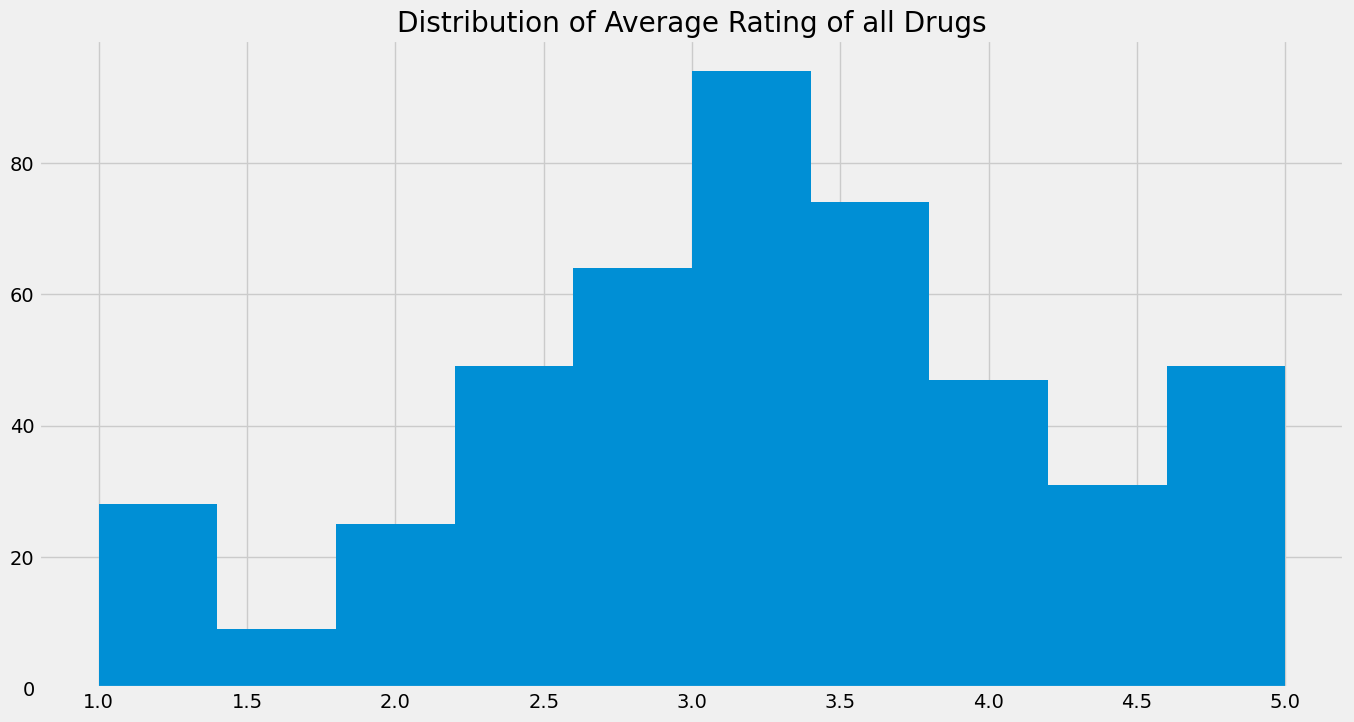

In [41]:
plt.figure(figsize=(15,8))

avg_rating.hist()
plt.title('Distribution of Average Rating of all Drugs')
plt.show()

##### Most of the Satisfaction score is between 3.0 to 3.5

In [42]:
df

,Condition,Drug,Indication,Type,Reviews,Effective,EaseOfUse,Satisfaction,Effectiveness,EaseToUse,satisfied
0,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,Neutral,Easy,Unsatisifed
1,Acute Bacterial Sinusitis,Levofloxacin,On Label,RX,994,2.52,3.01,1.84,Neutral,Easy,Unsatisifed
2,Acute Bacterial Sinusitis,Moxifloxacin,On Label,RX,755,2.78,3.00,2.08,Neutral,Easy,Partly Satisfied
3,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,Effective,Very Easy,Partly Satisfied
4,Acute Bacterial Sinusitis,Azithromycin,On Label,RX,584,3.21,4.01,2.57,Effective,Very Easy,Partly Satisfied
...,...,...,...,...,...,...,...,...,...,...,...
2214,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,2,5.00,5.00,5.00,Very Effective,Very Easy,Very Satisfied
2215,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,RX,1,5.00,5.00,5.00,Very Effective,Very Easy,Very Satisfied
2216,vulvovaginal candidiasis,Clotrimazole,On Label,OTC,1,5.00,4.00,5.00,Very Effective,Very Easy,Very Satisfied
2217,vulvovaginal candidiasis,Butoconazole Nitrate,On Label,OTC,1,5.00,5.00,5.00,Very Effective,Very Easy,Very Satisfied


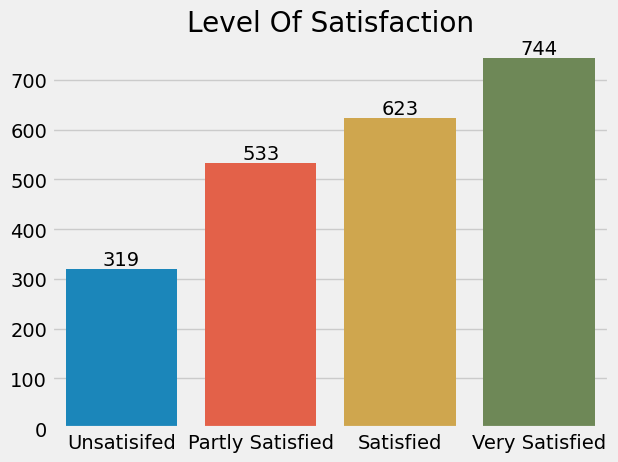

In [43]:
sns_1a = sns.countplot(data=df, x='satisfied')

for i in sns_1a.containers:
    sns_1a.bar_label(i, )
    
plt.title('Level Of Satisfaction')
sns_1a.set(xlabel=None, ylabel=None)
plt.show()

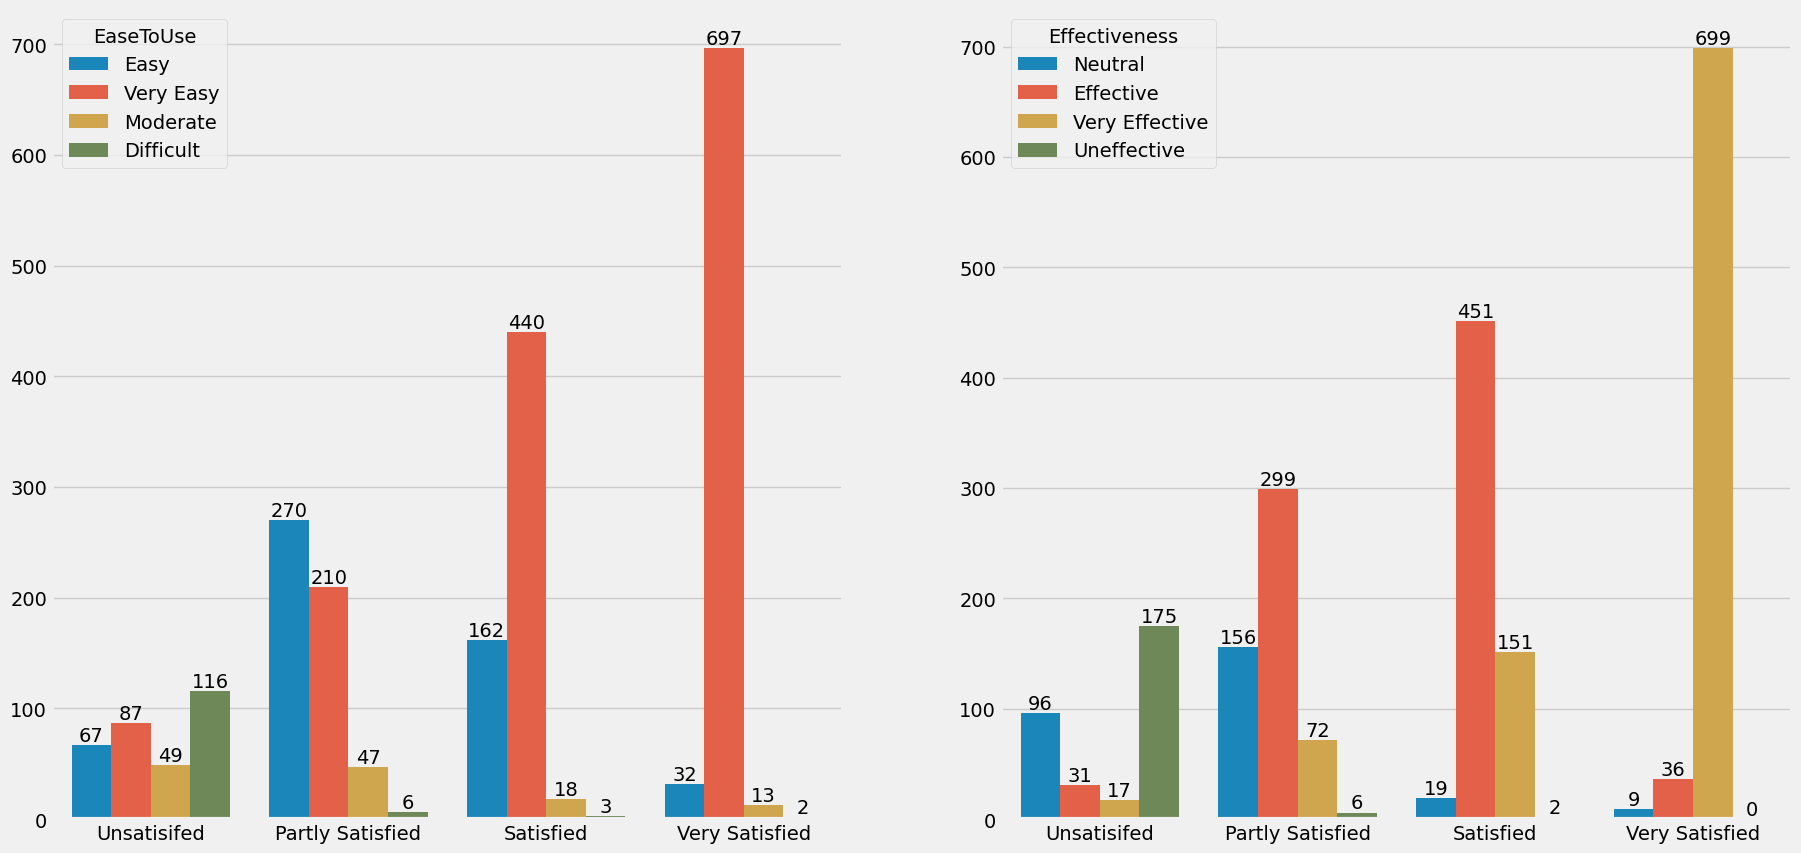

In [44]:
plt.figure(figsize=(20,10))

plt.subplot(1,2,1)
sns_1a = sns.countplot(data=df, x='satisfied', hue = 'EaseToUse')
for i in sns_1a.containers:
    sns_1a.bar_label(i, )
sns_1a.set(xlabel=None, ylabel=None)

plt.subplot(1,2,2)
sns_1a = sns.countplot(data=df, x='satisfied', hue = 'Effectiveness')
for i in sns_1a.containers:
    sns_1a.bar_label(i, )

sns_1a.set(xlabel=None, ylabel=None)
plt.show()

##### Most of the patients who are 'Very Satisfied' felt the Drugs are 'Very Easy' to use and 'Very Effective' in use.
##### 'Unsatisfied' category have felt the Drugs are 'Difficult' to use and 'Uneffective'

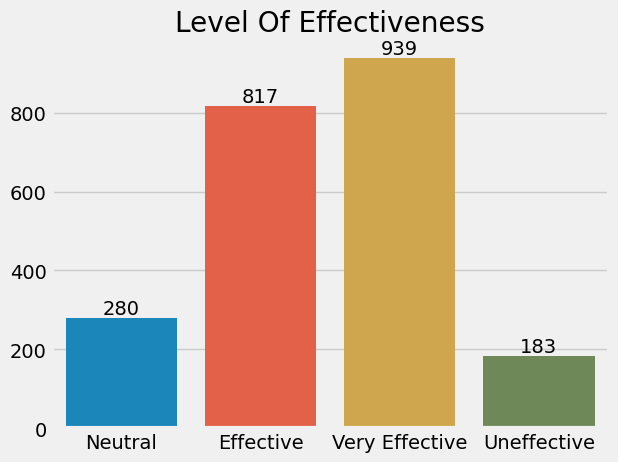

In [45]:
sns_1b = sns.countplot(data=df, x='Effectiveness')

for i in sns_1b.containers:
    sns_1b.bar_label(i, )
    
plt.title('Level Of Effectiveness')
sns_1b.set(xlabel=None, ylabel=None)
plt.show()

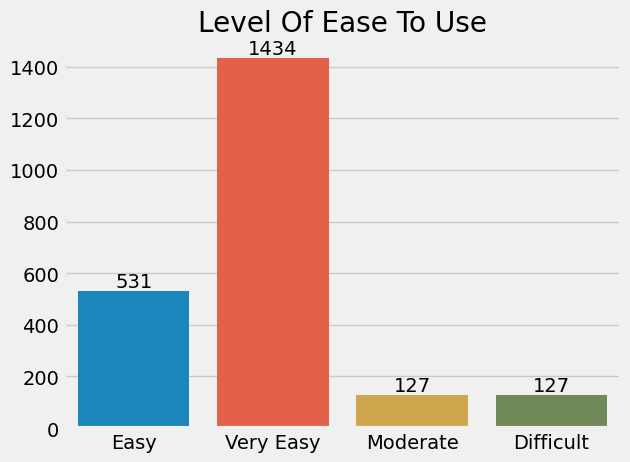

In [46]:
sns_1c = sns.countplot(data=df, x='EaseToUse')

for i in sns_1c.containers:
    sns_1c.bar_label(i, )
    
plt.title('Level Of Ease To Use')
sns_1c.set(xlabel=None, ylabel=None)
plt.show()

In [47]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [48]:
df['Condition'].value_counts()

fever                                        308
hypertension                                 236
Atopic Dermatitis                            209
endometriosis                                163
gastroesophageal reflux disease              131
Bacterial Urinary Tract Infection            131
back pain                                    123
gout                                         110
Pharyngitis due to Streptococcus Pyogenes     83
vertigo                                       81
flatulence                                    76
Acute Bacterial Sinusitis                     65
hypercholesterolemia                          59
hemorrhoids                                   53
diverticulitis of gastrointestinal tract      48
Bacterial Conjunctivitis                      42
edema                                         41
prevention of cerebrovascular accident        38
depression                                    32
vulvovaginal candidiasis                      29
fibromyalgia        

In [49]:
condition = 'hypertension'

# Define the features to be used in the model
features = ['EaseOfUse', 'Effective', 'Satisfaction']

# Create a new column with the combined features
df['combined_features'] = df[features].apply(lambda x: ' '.join(x.dropna().astype(str)), axis=1)

# Filter the dataset by the input condition
df_condition = df[df['Condition'] == condition]

# Define the TF-IDF vectorizer
tfidf = TfidfVectorizer(stop_words='english')

# Fit and transform the combined features
tfidf_matrix = tfidf.fit_transform(df_condition['combined_features'])

# Calculate the cosine similarity between the documents
cosine_sim = cosine_similarity(tfidf_matrix, tfidf_matrix)

# Get the indices of the top 5 drugs with the highest cosine similarity
drug_indices = np.argsort(cosine_sim[-1])[:-6:-1]

In [50]:
# Print the recommended drugs
print('Recommended drugs for {}:'.format(condition))
for idx in drug_indices[1:]:
    print('- {}'.format(df_condition.iloc[idx]['Drug']))

Recommended drugs for hypertension:
- Azilsartan Medoxomil
- Nifedipine
- Doxazosin
- Terazosin


## FINAL OBSERVATIONS:

##### 1. Acetaminophen, Diphenhydramine Hcl, ibuprofen are the drugs with highest Satisfactory Rating of 5
##### 2. Acetaminophen, Diphenhydramine HCl, ASpirin are the drugs with least Satisfactory Scores i.e less than 1.0
##### 3. Satisfaction and Effective have higher Correlation Score, that means if a drug is more effective, then the patient is  highly satisfied.
##### 4. Total Conditions suffered by patients:  37
##### 5. Fever, Hypertension, Atopic Dermatitis are the most common conditions suffered by patients, followed by others.
##### 6. Most of the Satisfaction score is between 3.0 to 3.5
##### 7. Most of the patients who are 'Very Satisfied' felt the Drugs are 'Very Easy' to use and 'Very Effective' in use.
##### 8. 'Unsatisfied' category have felt the Drugs are 'Difficult' to use and 'Uneffective'